In [12]:
#importamos librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
#cargar archivo csv
df=pd.read_csv('Mexico_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

listing_url  \
0   https://www.airbnb.com/rooms/35797   
1   https://www.airbnb.com/rooms/44616   
2   https://www.airbnb.com/rooms/67703   
3   https://www.airbnb.com/rooms/70644   
4  https://www.airbnb.com/rooms/107078   

                                               name  \
0                                       Villa Dante   
1                                      Condesa Haus   
2                 2 bedroom apt. deco bldg, Condesa   
3  Beautiful light Studio Coyoacan- full equipped !   
4                                NEW  DESIGNER LOFT   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  Comfortably furnished, sunny, 2 bedroom apt., ...   
3  COYOACAN designer studio quiet & safe! well eq...   
4  Is the best ever place triple L <br />Location...   

                               neighborhood_overview  \
0  Santa Fe Mall, Interloma Park and the Lion Des...   
1                        No se proporcionan detalles   
2                        No se proporcionan detalles   
3  Coyoacan is a beautiful neighborhood famous fo...   
4  Is located in the best area of Mexico City, Po...   

                                         picture_url host_name  host_since  \
0  https://a0.muscache.com/pictures/f395ab78-1185...      Dici  2010-06-28   
1  https://a0.muscache.com/pictures/251410/ec75fe...  Fernando  2010-08-09   
2  https://a0.muscache.com/pictures/3281720/6f078...  Nicholas  2011-01-04   
3  https://a0.muscache.com/pictures/f397d2da-d045...    Trisha  2010-08-24   
4  https://a0.muscache.com/pictures/bd64f86d-4931...    Andrea  2011-04-27   

   host_response_time host_response_rate host_is_superhost  ...  \
0  a few days or more                 0%                 f  ...   
1      within an hour               100%                 t  ...   
2      within an hour                71%                 t  ...   
3  within a few hours               100%                 t  ...   
4      within an hour               100%                 t  ...   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                      5.00                  5.00                        5.00   
1                      4.70                  4.87                        4.78   
2                      4.75                  4.94                        4.92   
3                      4.96                  4.96                        4.98   
4                      5.00                  5.00                        4.73   

  review_scores_location review_scores_value calculated_host_listings_count  \
0                   4.80                4.70                            1.0   
1                   4.98                4.48                            8.0   
2                   4.98                4.91                            2.0   
3                   4.96                4.92                            3.0   
4                   4.91                4.82                            3.0   

  calculated_host_listings_count_entire_homes  \
0                                         1.0   
1                                         4.0   
2                                         2.0   
3                                         2.0   
4                                         3.0   

  calculated_host_listings_count_private_rooms  \
0                                          0.0   
1                                          1.0   
2                                          0.0   
3                                          1.0   
4                                          0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              1.70  
1                                         0.0              0.41  
2                                         0.0              0.31  
3                                         0.0              0.83  
4        

In [14]:
f1=df

In [15]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   26582 non-null  object 
 1   name                                          26582 non-null  object 
 2   description                                   26582 non-null  object 
 3   neighborhood_overview                         26582 non-null  object 
 4   picture_url                                   26582 non-null  object 
 5   host_name                                     26582 non-null  object 
 6   host_since                                    26582 non-null  object 
 7   host_response_time                            26582 non-null  object 
 8   host_response_rate                            26582 non-null  object 
 9   host_is_superhost                             26582 non-null 

In [16]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\valer\AppData\Local\Temp\ipykernel_39604\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_39604\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_39604\3436113170.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

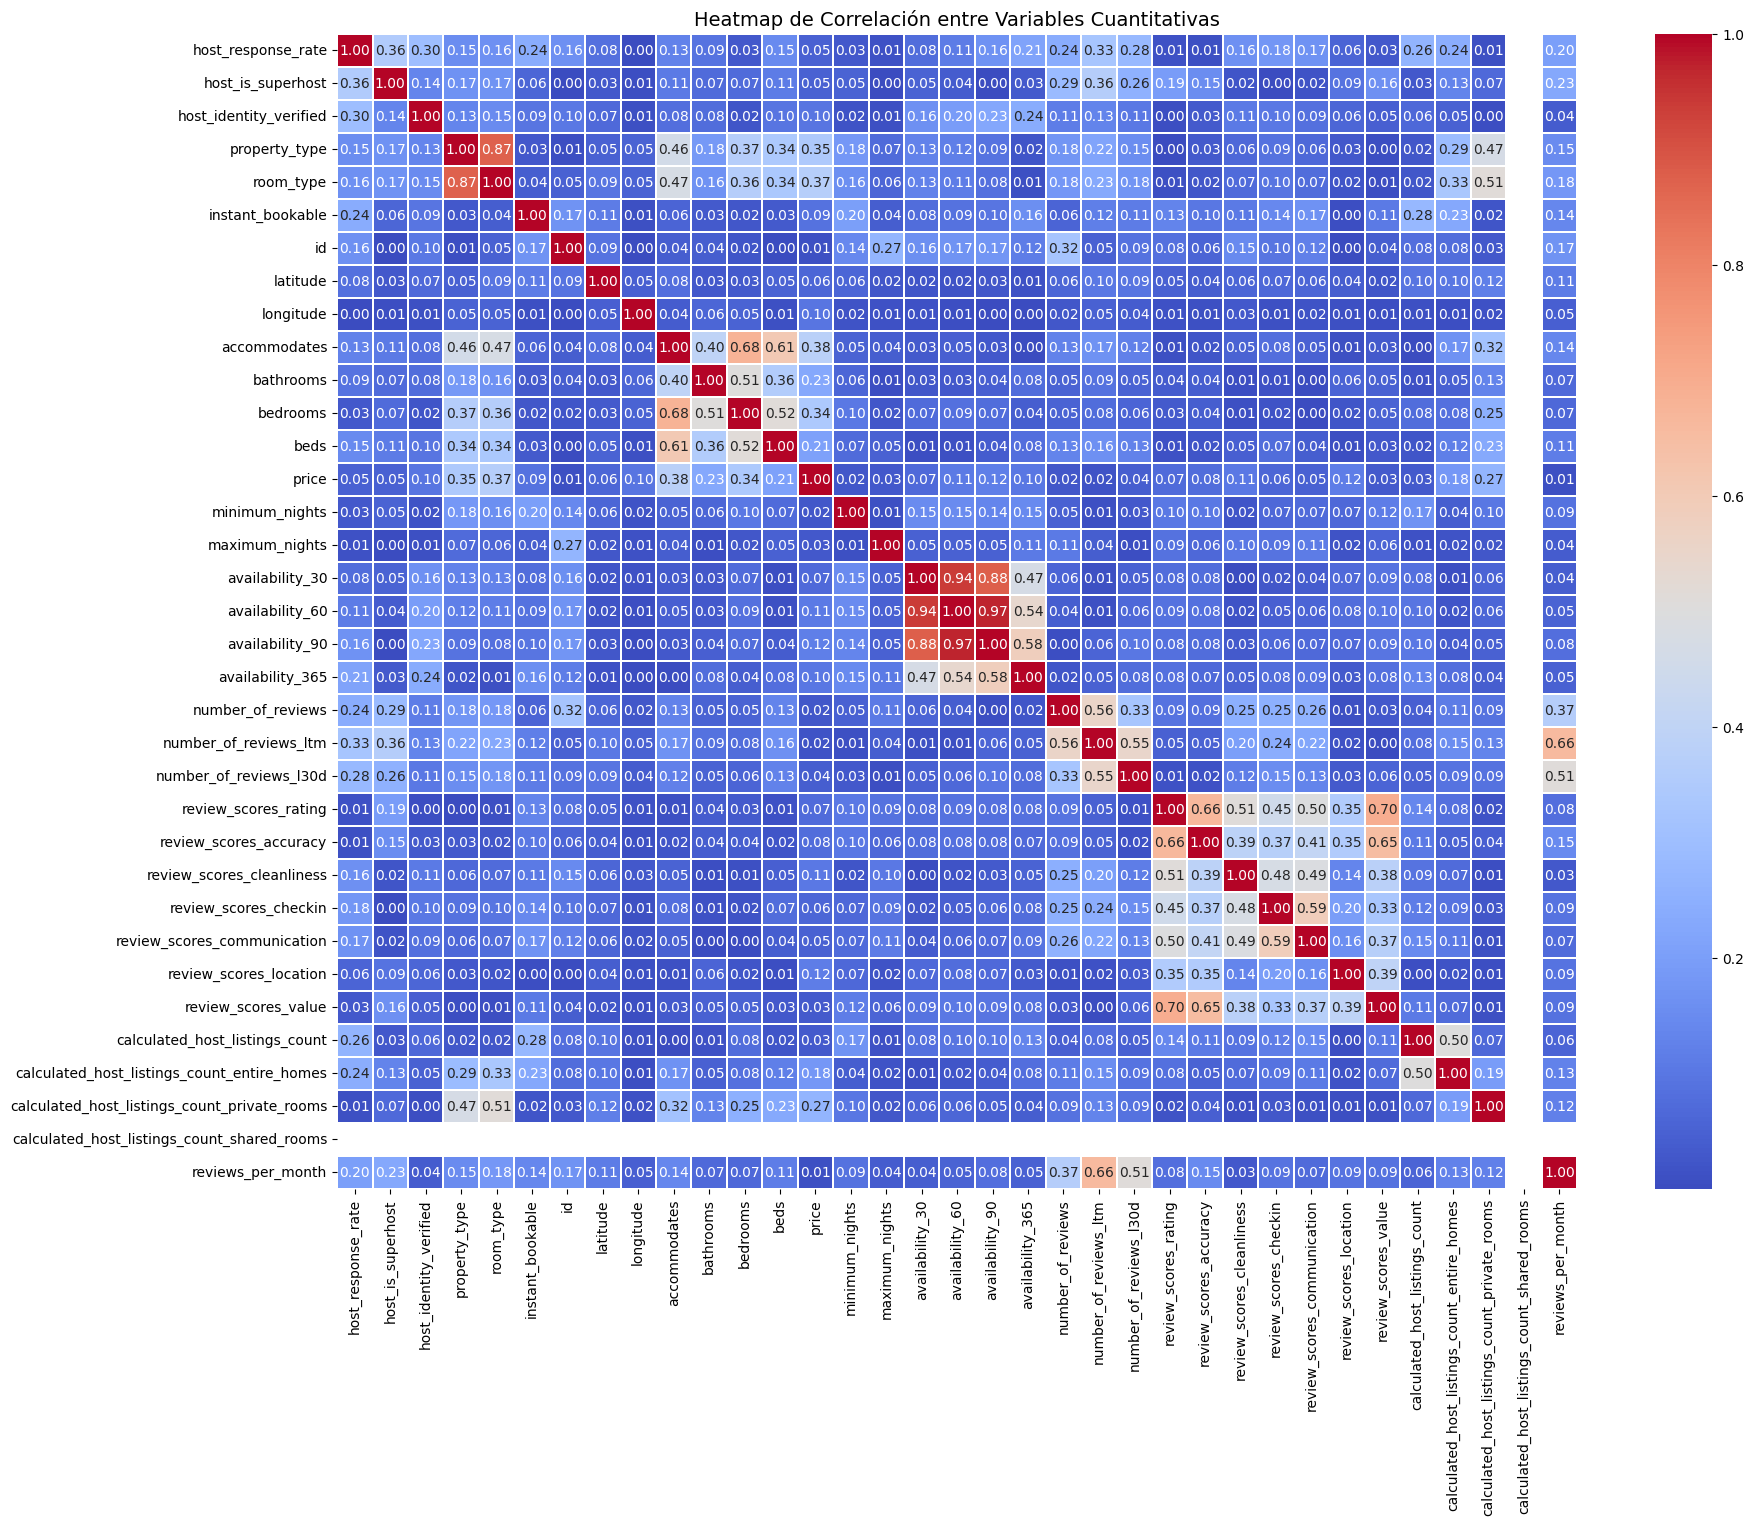

In [17]:
df_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(20, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

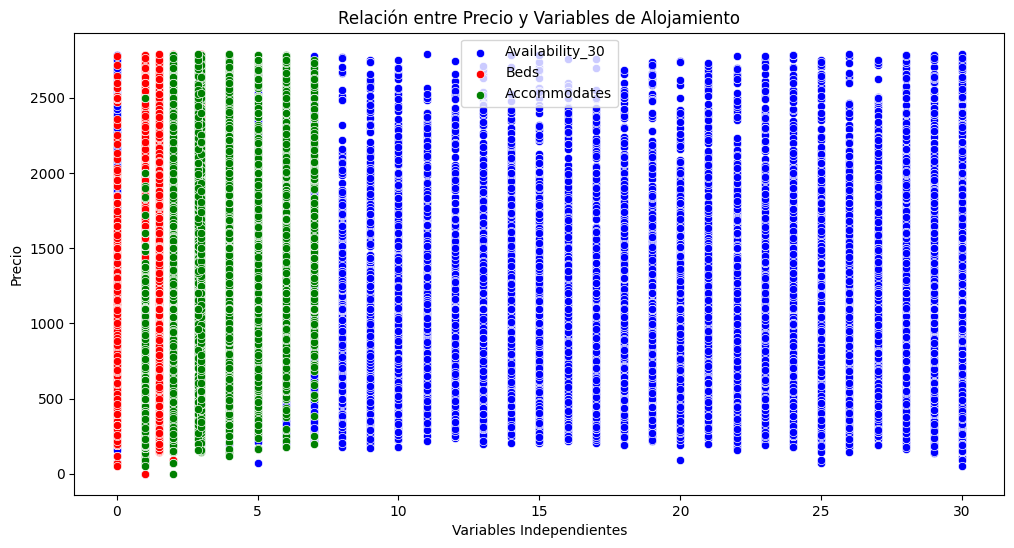

In [18]:
# Gráficos de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(x='availability_30', y='price', color='blue', data=df)
sns.scatterplot(x='beds', y='price', color='red', data=df)
sns.scatterplot(x='accommodates', y='price', color='green', data=df)
plt.xlabel('Variables Independientes')
plt.ylabel('Precio')
plt.title('Relación entre Precio y Variables de Alojamiento')
plt.legend(['Availability_30', 'Beds', 'Accommodates'])
plt.show()

In [19]:
# Declaración de variables independientes
Vars_Indep = df[['review_scores_cleanliness', 'review_scores_checkin', 'reviews_per_month', 'review_scores_communication']]
Vars_Indep2 = df[['reviews_per_month', 'number_of_reviews_l30d', 'number_of_reviews_ltm', 'host_is_superhost']]
Vars_Indep3 = df[['review_scores_value', 'review_scores_accuracy', 'review_scores_rating', 'host_response_rate']]
Vars_Indep4 = df[['calculated_host_listings_count_entire_homes', 'availability_365', 'availability_90', 'availability_60']]
Vars_Indep5 = df[['review_scores_location', 'availability_30', 'calculated_host_listings_count', 'maximum_nights']]
Vars_Indep6 = df[['price', 'beds', 'bedrooms', 'number_of_reviews_ltm']]
Vars_Indep7 = df[['price', 'beds', 'accommodates', 'review_scores_rating']]
Vars_Indep8 = df[['beds', 'bedrooms', 'accommodates', 'calculated_host_listings_count_entire_homes']]
Vars_Indep9 = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication']]
Vars_Indep10 = df[['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews', 'host_response_rate']]

In [20]:
#Declaración de variables dependientes
Var_Dep= df['id']
Var_Dep2= df['host_response_rate']
Var_Dep3= df['host_is_superhost']
Var_Dep4= df['calculated_host_listings_count']
Var_Dep5= df['room_type']
Var_Dep6= df['accommodates']
Var_Dep7= df['bedrooms']
Var_Dep8= df['price']
Var_Dep9= df['review_scores_value']
Var_Dep10= df['reviews_per_month']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2= LinearRegression()
model3= LinearRegression()
model4= LinearRegression()
model5= LinearRegression()
model6= LinearRegression()
model7= LinearRegression()
model8= LinearRegression()
model9= LinearRegression()
model10= LinearRegression()

In [22]:
#Verificamos la función relacionada al modelo
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [24]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
model2.__dict__
model3.__dict__
model4.__dict__
model5.__dict__
model6.__dict__
model7.__dict__
model8.__dict__
model9.__dict__
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews', 'host_response_rate'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.04618565,  0.18410222, -0.00023452, -0.00114508]),
 'rank_': 4,
 'singular_': array([6460.04508982, 4782.2599868 , 1663.07850368,  171.79346342]),
 'intercept_': np.float64(0.876610324633397)}

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
model2.score(Vars_Indep2,Var_Dep2)
model3.score(Vars_Indep3,Var_Dep3)
model4.score(Vars_Indep4,Var_Dep4)
model5.score(Vars_Indep5,Var_Dep5)
model6.score(Vars_Indep6,Var_Dep6)
model7.score(Vars_Indep7,Var_Dep7)
model8.score(Vars_Indep8,Var_Dep8)
model9.score(Vars_Indep9,Var_Dep9)
model10.score(Vars_Indep10,Var_Dep10)

0.4680349561843339

In [26]:

#Predecimos los valores de totales
y_pred= model.predict (X=df[['review_scores_cleanliness','review_scores_checkin','reviews_per_month','review_scores_communication']])
y_pred2= model2.predict (X=df[['reviews_per_month','number_of_reviews_l30d','number_of_reviews_ltm','host_is_superhost']])
y_pred3= model3.predict (X=df[['review_scores_value','review_scores_accuracy','review_scores_rating','host_response_rate']])
y_pred4= model4.predict (X=df[['calculated_host_listings_count_entire_homes','availability_365','availability_90','availability_60']])
y_pred5= model5.predict (X=df[['review_scores_location','availability_30','calculated_host_listings_count','maximum_nights']])
y_pred6= model6.predict (X=df[['price','beds','bedrooms','number_of_reviews_ltm']])
y_pred7= model7.predict (X=df[['price','beds','accommodates','review_scores_rating']])
y_pred8= model8.predict (X=df[['beds','bedrooms','accommodates','calculated_host_listings_count_entire_homes']])
y_pred9= model9.predict (X=df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_communication']])
y_pred10= model10.predict (X=df[['number_of_reviews_ltm','number_of_reviews_l30d','number_of_reviews','host_response_rate']])

In [27]:
#Insertamos la columna de predicciones en el DataFrame
df_numeric.insert(0, 'Pred_id', y_pred)
df_numeric.insert(0, 'Pred_rate', y_pred2)
df_numeric.insert(0, 'Pred_superhost', y_pred3)
df_numeric.insert(0, 'Pred_calc_host', y_pred4)
df_numeric.insert(0, 'Pred_room', y_pred5)
df_numeric.insert(0, 'Pred_accmm', y_pred6)
df_numeric.insert(0, 'Pred_bedrm', y_pred7)
df_numeric.insert(0, 'Pred_price', y_pred8)
df_numeric.insert(0, 'Pred_rv_score', y_pred9)
df_numeric.insert(0, 'Pred_rv_month', y_pred10)

<Axes: xlabel='review_scores_communication', ylabel='id'>

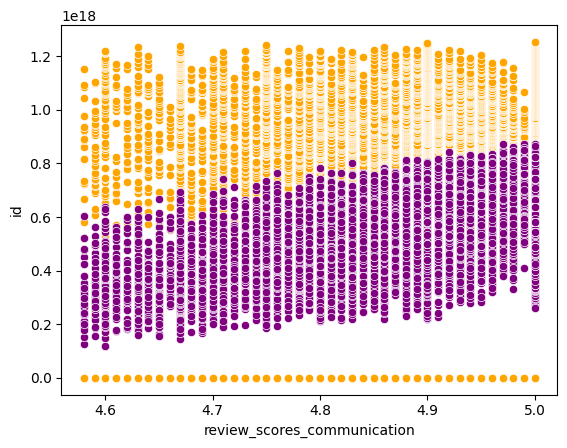

In [28]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_communication', y='id', color="orange", data=df_numeric)
sns.scatterplot(x='review_scores_communication', y='Pred_id', color="purple", data=df_numeric)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

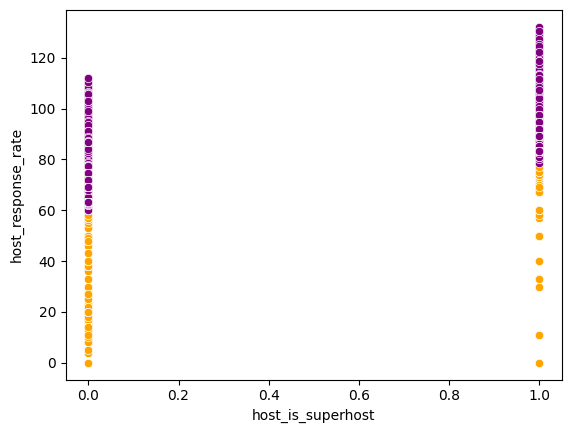

In [29]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="orange", data=df_numeric)
sns.scatterplot(x='host_is_superhost', y='Pred_rate', color="purple", data=df_numeric)

<Axes: xlabel='review_scores_rating', ylabel='host_is_superhost'>

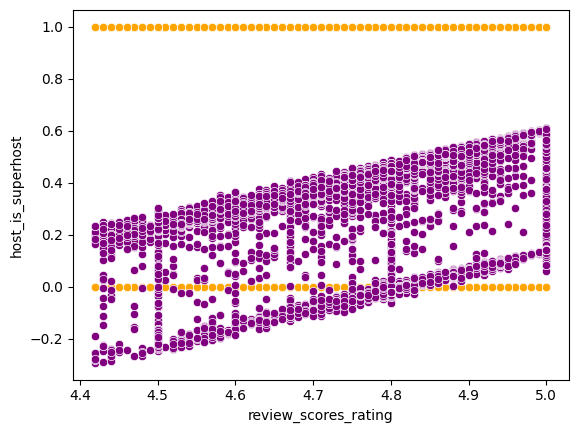

In [30]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="orange", data=df_numeric)
sns.scatterplot(x='review_scores_rating', y='Pred_superhost', color="purple", data=df_numeric)

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='calculated_host_listings_count'>

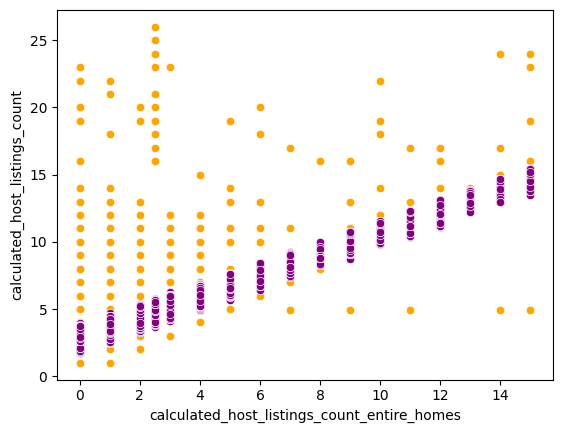

In [31]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='calculated_host_listings_count', color="orange", data=df_numeric)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='Pred_calc_host', color="purple", data=df_numeric)

<Axes: xlabel='review_scores_location', ylabel='room_type'>

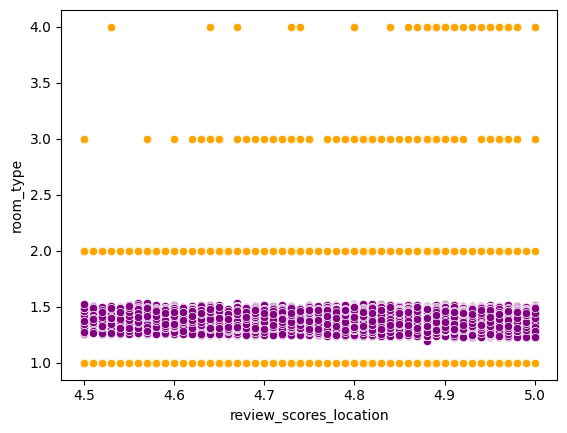

In [32]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_location', y='room_type', color="orange", data=df_numeric)
sns.scatterplot(x='review_scores_location', y='Pred_room', color="purple", data=df_numeric)

<Axes: xlabel='beds', ylabel='accommodates'>

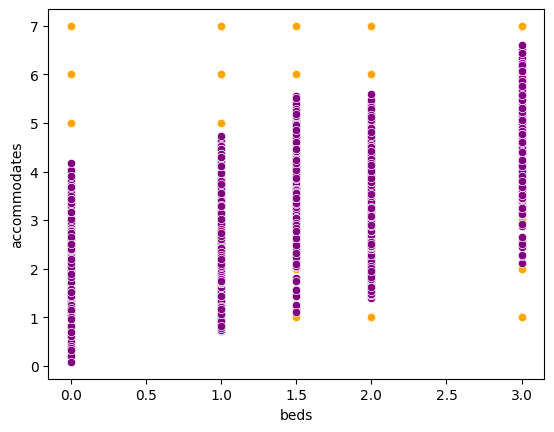

In [33]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='beds', y='accommodates', color="orange", data=df_numeric)
sns.scatterplot(x='beds', y='Pred_accmm', color="purple", data=df_numeric)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

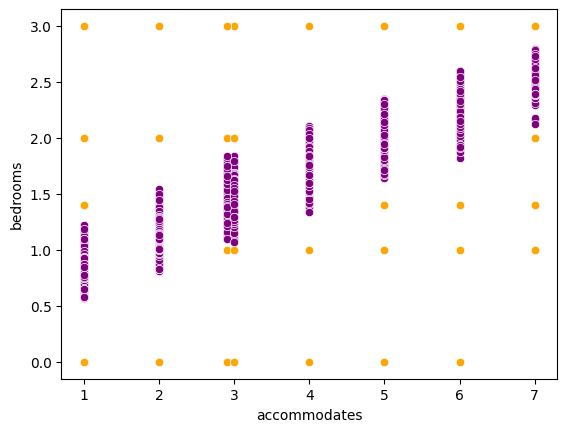

In [34]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='accommodates', y='bedrooms', color="orange", data=df_numeric)
sns.scatterplot(x='accommodates', y='Pred_bedrm', color="purple", data=df_numeric)

<Axes: xlabel='bedrooms', ylabel='price'>

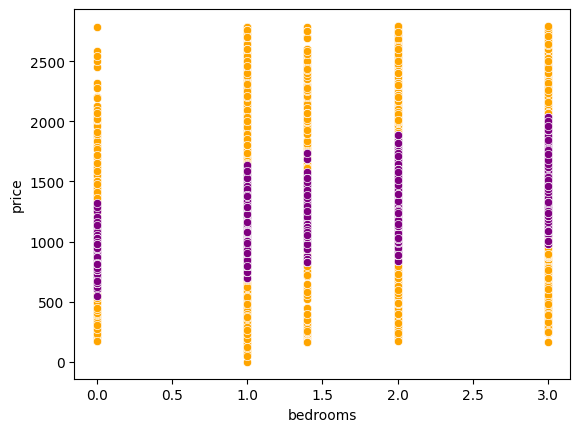

In [35]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bedrooms', y='price', color="orange", data=df_numeric)
sns.scatterplot(x='bedrooms', y='Pred_price', color="purple", data=df_numeric)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

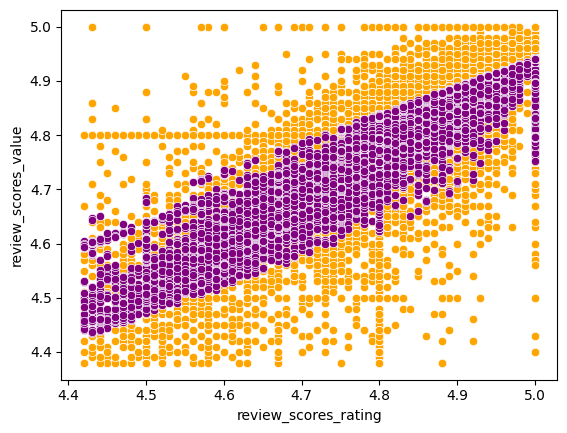

In [36]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="orange", data=df_numeric)
sns.scatterplot(x='review_scores_rating', y='Pred_rv_score', color="purple", data=df_numeric)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

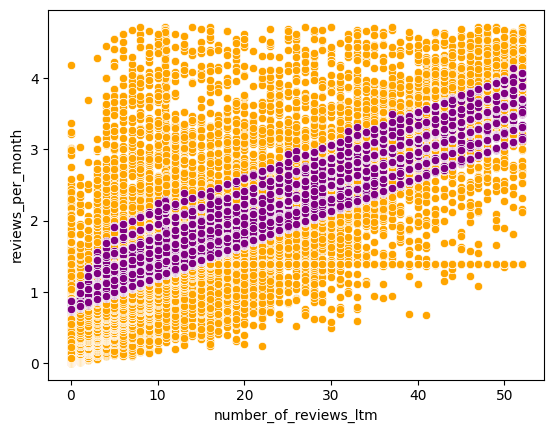

In [37]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="orange", data=df_numeric)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_rv_month', color="purple", data=df_numeric)

In [38]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter2= model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter3= model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter4= model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter5= model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter6= model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter7= model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter8= model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter9= model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter10= model10.score(X=Vars_Indep10, y=Var_Dep10)

In [39]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl10=np.sqrt(coef_Deter10)

In [40]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=df_numeric.corr()
Corr_Factors

Pred_rv_month  Pred_rv_score  \
Pred_rv_month                                      1.000000      -0.040533   
Pred_rv_score                                     -0.040533       1.000000   
Pred_price                                         0.161947      -0.000313   
Pred_bedrm                                         0.162634       0.055074   
Pred_accmm                                         0.213332       0.041727   
Pred_room                                         -0.004739      -0.090748   
Pred_calc_host                                     0.137021      -0.096889   
Pred_superhost                                     0.242626       0.470681   
Pred_rate                                          0.799675       0.111196   
Pred_id                                            0.345766       0.334805   
host_response_rate                                 0.294818      -0.005426   
host_is_superhost                                  0.355090       0.191177   
host_identity_verified                             0.120488       0.016414   
property_type                                     -0.215753      -0.015493   
room_type                                         -0.234052      -0.003738   
instant_bookable                                   0.117147      -0.130629   
id                                                -0.016695       0.081637   
latitude                                           0.108952      -0.050637   
longitude                                          0.052724      -0.012084   
accommodates                                       0.165866       0.014954   
bathrooms                                          0.082485       0.043054   
bedrooms                                           0.079224       0.039923   
beds                                               0.161256       0.016268   
price                                             -0.023733       0.081038   
minimum_nights                                    -0.001961       0.112349   
maximum_nights                                     0.028651      -0.084490   
availability_30                                    0.002050      -0.083097   
availability_60                                    0.023280      -0.092893   
availability_90                                    0.066953      -0.088765   
availability_365                                   0.052725      -0.084695   
number_of_reviews                                  0.534312      -0.100480   
number_of_reviews_ltm                              0.964425      -0.056888   
number_of_reviews_l30d                             0.746682       0.013903   
review_scores_rating                              -0.033720       0.942623   
review_scores_accuracy                            -0.038138       0.875504   
review_scores_cleanliness                         -0.189003       0.513887   
review_scores_checkin                             -0.235464       0.458819   
review_scores_communication                       -0.208677       0.500949   
review_scores_location                             0.020226       0.385082   
review_scores_value                                0.014965       0.741305   
calculated_host_listings_count                     0.064355      -0.136883   
calculated_host_listings_count_entire_homes        0.139725      -0.078475   
calculated_host_listings_count_private_rooms      -0.132511      -0.031128   
calculated_host_listings_count_shared_rooms             NaN            NaN   
reviews_per_month                                  0.684131      -0.115297   

                                              Pred_price  Pred_bedrm  \
Pred_rv_month                                   0.161947    0.162634   
Pred_rv_score                                  -0.000313    0.055074   
Pred_price                                      1.000000    0.882399   
Pred_bedrm                                      0.882399    1.000000   
Pred_accmm                                      0.801598    0.850978   
Pred_room                

In [41]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Pred_rv_month  Pred_rv_score  \
Pred_rv_month                                      1.000000       0.040533   
Pred_rv_score                                      0.040533       1.000000   
Pred_price                                         0.161947       0.000313   
Pred_bedrm                                         0.162634       0.055074   
Pred_accmm                                         0.213332       0.041727   
Pred_room                                          0.004739       0.090748   
Pred_calc_host                                     0.137021       0.096889   
Pred_superhost                                     0.242626       0.470681   
Pred_rate                                          0.799675       0.111196   
Pred_id                                            0.345766       0.334805   
host_response_rate                                 0.294818       0.005426   
host_is_superhost                                  0.355090       0.191177   
host_identity_verified                             0.120488       0.016414   
property_type                                      0.215753       0.015493   
room_type                                          0.234052       0.003738   
instant_bookable                                   0.117147       0.130629   
id                                                 0.016695       0.081637   
latitude                                           0.108952       0.050637   
longitude                                          0.052724       0.012084   
accommodates                                       0.165866       0.014954   
bathrooms                                          0.082485       0.043054   
bedrooms                                           0.079224       0.039923   
beds                                               0.161256       0.016268   
price                                              0.023733       0.081038   
minimum_nights                                     0.001961       0.112349   
maximum_nights                                     0.028651       0.084490   
availability_30                                    0.002050       0.083097   
availability_60                                    0.023280       0.092893   
availability_90                                    0.066953       0.088765   
availability_365                                   0.052725       0.084695   
number_of_reviews                                  0.534312       0.100480   
number_of_reviews_ltm                              0.964425       0.056888   
number_of_reviews_l30d                             0.746682       0.013903   
review_scores_rating                               0.033720       0.942623   
review_scores_accuracy                             0.038138       0.875504   
review_scores_cleanliness                          0.189003       0.513887   
review_scores_checkin                              0.235464       0.458819   
review_scores_communication                        0.208677       0.500949   
review_scores_location                             0.020226       0.385082   
review_scores_value                                0.014965       0.741305   
calculated_host_listings_count                     0.064355       0.136883   
calculated_host_listings_count_entire_homes        0.139725       0.078475   
calculated_host_listings_count_private_rooms       0.132511       0.031128   
calculated_host_listings_count_shared_rooms             NaN            NaN   
reviews_per_month                                  0.684131       0.115297   

                                              Pred_price  Pred_bedrm  \
Pred_rv_month                                   0.161947    0.162634   
Pred_rv_score                                   0.000313    0.055074   
Pred_price                                      1.000000    0.882399   
Pred_bedrm                                      0.882399    1.000000   
Pred_accmm                                      0.801598    0.850978   
Pred_room                

<Axes: >

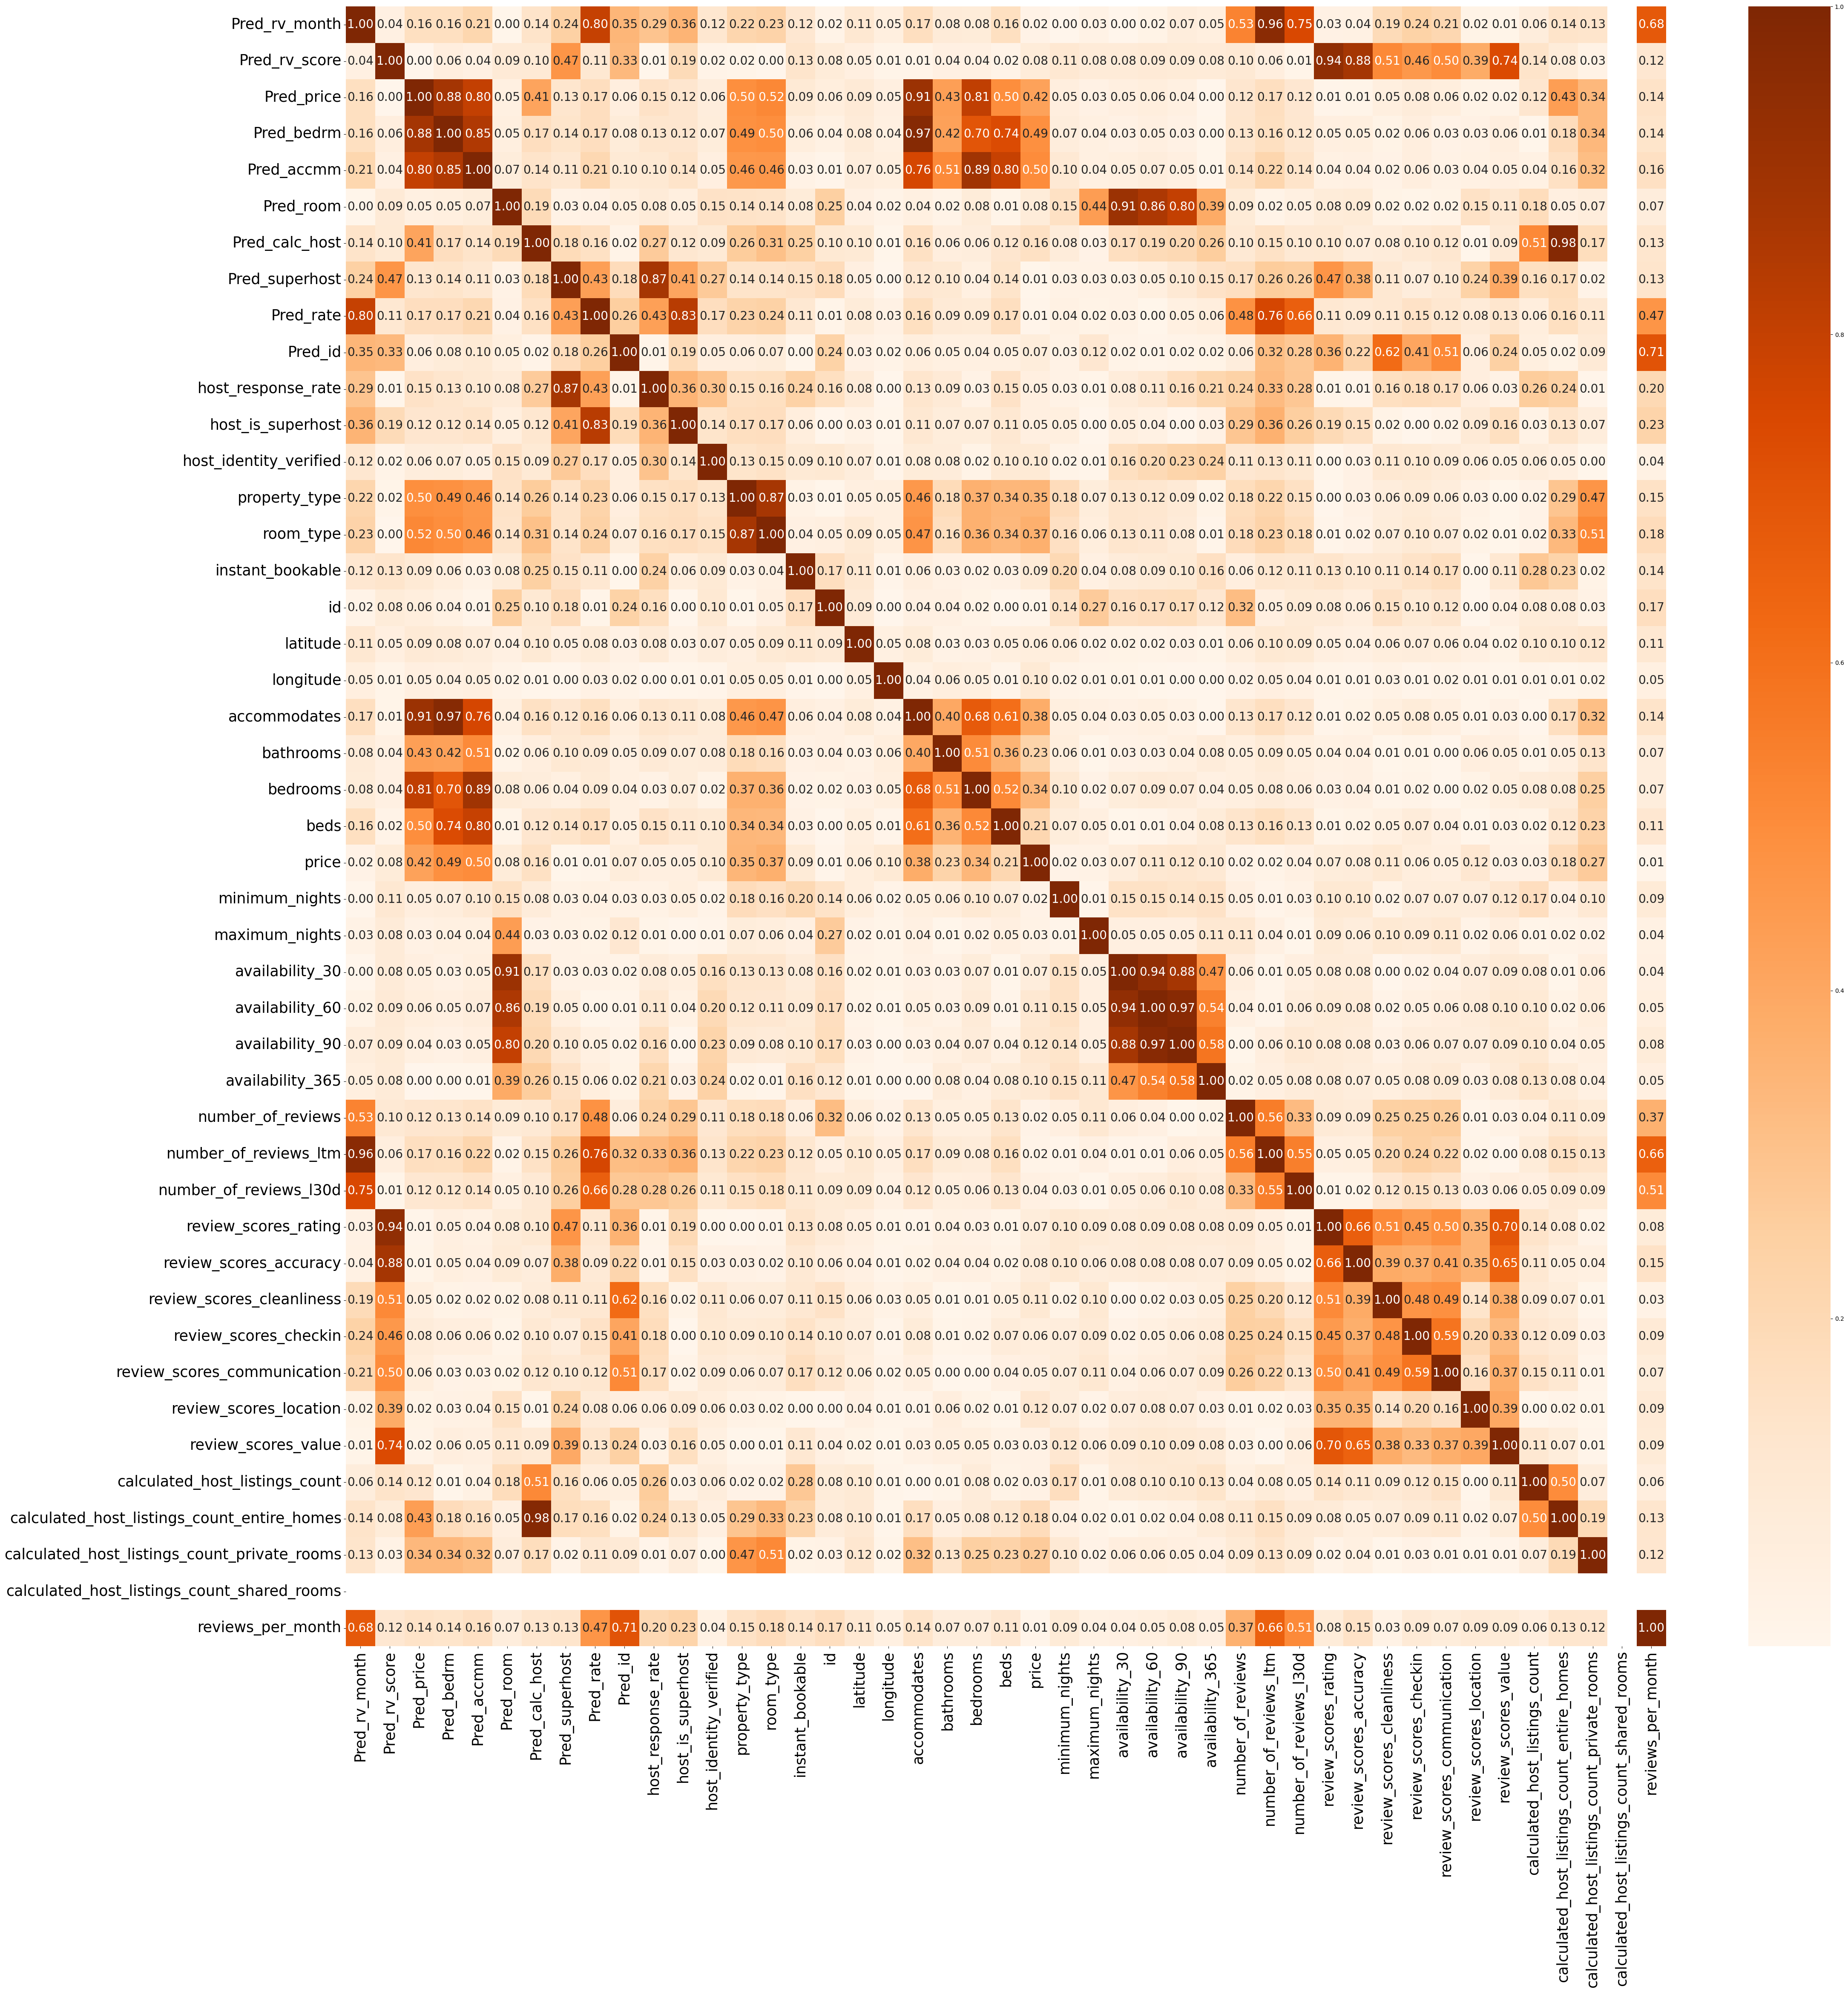

In [42]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(50,50))
plt.xticks(fontsize=25)  # Tamaño de etiquetas del eje X
plt.yticks(fontsize=25) 
Heat_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f", annot_kws={"size": 20})
Heat_Nap